In [44]:
import nltk
from nltk.corpus import twitter_samples

# Download NLTK resources
nltk.download('twitter_samples')
nltk.download('stopwords')


[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Preparing the data**

In [45]:
from nltk.corpus import twitter_samples
positive_tweets = twitter_samples.strings('positive_tweets.json')

In [36]:
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [37]:
import pandas as pd
# creating a dataframe for positive tweets and adding a sentiment column with ones
df = pd.DataFrame(positive_tweets, columns=['Tweet'])
df['Sentiment'] = 1

# creating a dataframe for negative tweets and adding a sentiment column with zeroes
temp_df = pd.DataFrame(negative_tweets, columns=['Tweet'])
temp_df['Sentiment'] = 0

# appending the negative dataframe to positive, index is reset after appending
df = pd.concat([df, temp_df], ignore_index=True)

# shuffles the rows of the dataframe randomly
df = df.sample(frac = 1)

# resets the index after shuffling
df.reset_index(drop=True, inplace=True)
# df

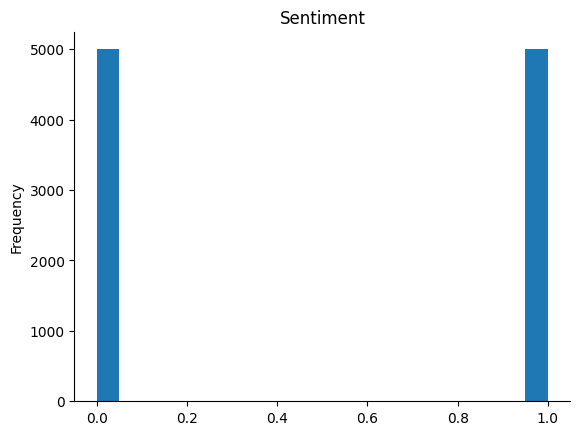

In [38]:
from matplotlib import pyplot as plt
df['Sentiment'].plot(kind='hist', bins=20, title='Sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Cleaning the data**

In [39]:
# Converting every sentence to lowercase
df['Tweet'] = df['Tweet'].apply(lambda x: x.lower())

# removing urls
import re
def remove_urls(Tweet):
 Tweet = re.sub('http[s]?://(?:[a-zA-Z]|[0–9]|[$-_@.&+#]|[!*\(\),]|’\‘(?:%[0–9a-fA-F][0–9a-fA-F]))+','', Tweet)
 return Tweet

df['Tweet'] = df['Tweet'].apply(lambda x: remove_urls(x))


# Removing twitter handles, punctuation, extra spaces, numbers and special characters
import string
import re

def remove_noise(tweet):
    tweet = re.sub(r"(@[A-Za-z0–9_]+)", "", tweet)
    tweet = "".join([char if char not in string.punctuation else " " for char in tweet])
    tweet = re.sub(r' +', ' ', tweet)
    tweet = re.sub(r"[0–9]+", "", tweet)
    tweet = re.sub(r"[^A-Za-z0–9_. ]+", "", tweet)
    return tweet

df['Tweet'] = df['Tweet'].apply(lambda x: remove_noise(x))


# removing stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

  # Loading stop words and removing negative stop words from the list
stop_words = stopwords.words('english')
words_to_keep = ['don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn',
                 "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma',
                 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'no',
                 'nor', 'not', 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won',
                 "won't", 'wouldn', "wouldn't"]
my_stop_words = stop_words
for word in words_to_keep:
  my_stop_words.remove(word)

  # Removing stop words from the Tweet
def remove_stop_words(Tweet):
 tokens = word_tokenize(Tweet)
 Tweet_with_no_stop_words = [token for token in tokens if not token in my_stop_words]
 reformed_Tweet =' '.join(Tweet_with_no_stop_words)
 return reformed_Tweet

df['Tweet'] = df['Tweet'].apply(lambda x: remove_stop_words(x))


# stemming
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

def lemmatise_sentence(Tweet):
 token_words = word_tokenize(Tweet)
 lemmatized_Tweet = []
 for word in token_words:
  lemmatized_Tweet.append(stemmer.stem(word))
  lemmatized_Tweet.append(" ")
 return "".join(lemmatized_Tweet)
df['Tweet'] = df['Tweet'].apply(lambda x: lemmatise_sentence(x))

# df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **training and testing**

In [40]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Sentiment'], test_size=0.2, random_state=42)
# Vectorize tweets
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [41]:
# Logistic Regression Classifier
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
logistic_accuracy = lr.score(X_test, y_test)
print(logistic_accuracy)

0.741


Accuracy: 0.741
Precision: [0.72502379 0.75869336]
Recall: [0.76892028 0.7135778 ]
F1 Score: [0.74632713 0.73544433]




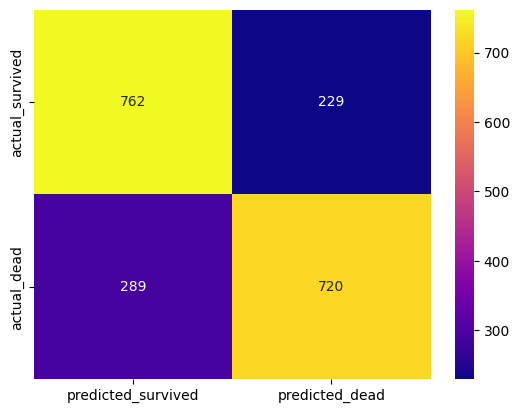

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test,y_pred)

accuracy = np.trace(cm) / np.sum(cm)
precision = np.diag(cm) / np.sum(cm, axis=0)
recall = np.diag(cm) / np.sum(cm, axis=1)
f1 = 2 * (precision * recall) / (precision + recall)

sns.heatmap(cm, xticklabels=['predicted_survived', 'predicted_dead'], yticklabels=['actual_survived', 'actual_dead']
            , annot=True, fmt='d', annot_kws={'fontsize': 10}, cmap="plasma")

print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))
print('\n')

In [43]:
# Naive Bayes Classifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
nb_accuracy = nb.score(X_test,y_test)
print(nb_accuracy)

0.738


Accuracy: 0.738
Precision: [0.71640408 0.76330076]
Recall: [0.78002018 0.69672944]
F1 Score: [0.7468599  0.72849741]




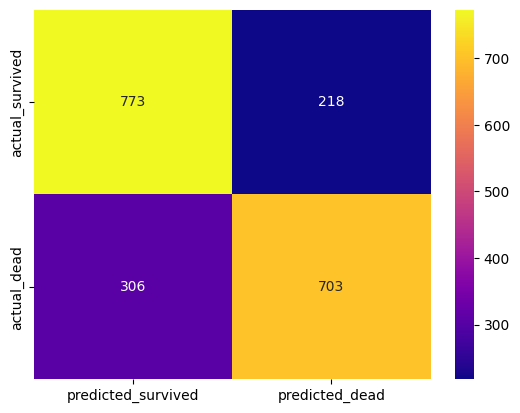

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test,y_pred)

accuracy = np.trace(cm) / np.sum(cm)
precision = np.diag(cm) / np.sum(cm, axis=0)
recall = np.diag(cm) / np.sum(cm, axis=1)
f1 = 2 * (precision * recall) / (precision + recall)

sns.heatmap(cm, xticklabels=['predicted_survived', 'predicted_dead'], yticklabels=['actual_survived', 'actual_dead']
            , annot=True, fmt='d', annot_kws={'fontsize': 10}, cmap="plasma")

print('Accuracy: {:.3f}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 Score: {}'.format(f1))
print('\n')